In [1]:
import sys
sys.path.append("..")
from torchvision.datasets import CIFAR10, MNIST
from src.data.datamodules.SpikingDataModule import SpikingDataModule
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([
                                    transforms.ToTensor()
                                ]) 
cifar10 = CIFAR10("../data/", train=True, download=False, transform=transform)
mnist = MNIST("../data/", train=True, download=False, transform=transform)

cifar10_test = CIFAR10("../data/", train=False, download=False, transform=transform)
mnist_test = MNIST("../data/", train=False, download=False, transform=transform)

print("Cifar10 train: ", len(cifar10),
      "Cifar10 test: ", len(cifar10_test),
      "Mnist train: ", len(mnist),
      "Mnist test: ", len(mnist_test))

print("Cifar10 train: ", len(cifar10),
      "Cifar10 test: ", len(cifar10_test),
      "Mnist train: ", len(mnist),
      "Mnist test: ", len(mnist_test))


Cifar10 train:  50000 Cifar10 test:  10000 Mnist train:  60000 Mnist test:  10000
Cifar10 train:  50000 Cifar10 test:  10000 Mnist train:  60000 Mnist test:  10000


In [8]:
data_module = SpikingDataModule(dataset="mnist", data_dir="../data/", seed=42, input_transform=transform, train_split=0.85)
data_module.setup()
len(data_module.train_dataset),len(data_module.val_dataset),len(data_module.test_dataset)

(51000, 9000, 10000)

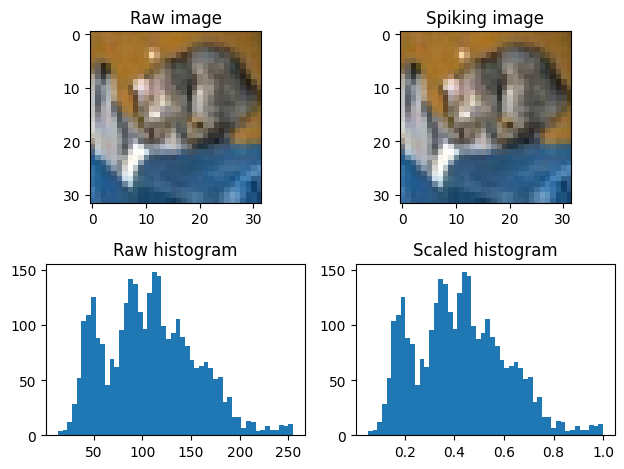

: 

In [54]:
plt.subplot(2,2,1)
plt.imshow(cifar10.data[0])
plt.title("Raw image")
plt.subplot(2,2,2)
plt.imshow(data_module.val_dataset[0][0].permute(1,2,0).numpy())
plt.title("Spiking image")
plt.subplot(2,2,3)
plt.hist(cifar10.data[0].flatten(), bins=50)
plt.title("Raw histogram")
plt.subplot(2,2,4)
plt.hist(data_module.val_dataset[0][0].permute(1,2,0).numpy().flatten(), bins=50)
plt.title("Scaled histogram")
plt.tight_layout()
plt.show()